<a href="https://colab.research.google.com/github/Jaeek27/Data-Science-Projects/blob/main/Logistic_Regression_Credit_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## | CREDIT CLASSIFICATION - To predict whether a credit is a good or bad credit

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm    
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
credit_df = pd.read_csv("/content/LR German Credit Data.csv")
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [3]:
credit_df.iloc[0:8,0:7]

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate
0,A11,6,A34,1169,A65,A75,4
1,A12,48,A32,5951,A61,A73,2
2,A14,12,A34,2096,A61,A74,2
3,A11,42,A32,7882,A61,A74,2
4,A11,24,A33,4870,A61,A73,3
5,A14,36,A32,9055,A65,A73,2
6,A14,24,A32,2835,A63,A75,3
7,A12,36,A32,6948,A61,A73,2


In [4]:
credit_df.iloc[0:8,7:]

,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A93,4,67,A143,2,A173,0
1,A92,2,22,A143,1,A173,1
2,A93,3,49,A143,1,A172,0
3,A93,4,45,A143,1,A173,0
4,A93,4,53,A143,2,A173,1
5,A93,4,35,A143,1,A172,0
6,A93,4,53,A143,1,A173,0
7,A93,2,35,A143,1,A174,0


In [5]:
credit_df.status.value_counts()  ## It will count the values in status column 

0    700
1    300
Name: status, dtype: int64

In [6]:
from sklearn import metrics

In [7]:
## creating a list named X_features and storing the names of all independent variables 
X_features = list( credit_df.columns ) 
X_features.remove( 'status' ) 
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [8]:
encoded_credit_df = pd.get_dummies(credit_df[X_features], drop_first = True)  

In [9]:
list(encoded_credit_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [10]:
encoded_credit_df[['personal_status_A92','personal_status_A93','personal_status_A94']].head(5)

,personal_status_A92,personal_status_A93,personal_status_A94
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [11]:
import statsmodels.api as sm

Y = credit_df.status
X = sm.add_constant(encoded_credit_df)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
## Splitting Dataset into Training and Test Sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42) ## Spliting data 

In [13]:
logit = sm.Logit(Y_train, X_train)  ## Building Logistic Regression Model 
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.488938
         Iterations 6


In [14]:
## Printing Model Summary
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   status            AIC:               744.5132  
Date:                 2023-01-21 11:39  BIC:               881.0456  
No. Observations:     700               Log-Likelihood:    -342.26   
Df Model:             29                LL-Null:           -426.75   
Df Residuals:         670               LLR p-value:       1.0630e-21
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                 -0.1511   1.1349 -0.1331 0.8941 -2.3754  2.0733
duration               0.0206   0.0104  1.9927 0.0463  0.0003  0.0409
amount                 0.0001   0.0000  2.3765 0.0175  0.0000  0.0002
inst_rate              0.3064   0.0986  3.1083 0.0019  0.1132  0.4996
residing_since         0.0967   0.0920  1.0511 0.2932 -0.0836  0.2771
age                   -0.0227   0.0103 -2.2131 0.0269 -0.0428 -0.0026
num_credits            0.2854   0.2139  1.3342 0.1821 -0.1338  0.7045
checkin_acc_A12       -0.4126   0.2391 -1.7260 0.0843 -0.8812  0.0559
checkin_acc_A13       -0.9053   0.4338 -2.0868 0.0369 -1.7556 -0.0550
checkin_acc_A14       -1.6052   0.2586 -6.2073 0.0000 -2.1120 -1.0983
credit_history_A31     0.1532   0.5795  0.2643 0.7916 -0.9827  1.2890
credit_history_A32    -0.4960   0.4411 -1.1245 0.2608 -1.3604  0.3685
credit_history_A33    -0.8881   0.5022 -1.7683 0.0770 -1.8724  0.0962
credit_history_A34    -1.4124   0.4528 -3.1190 0.0018 -2.2999 -0.5249
savings_acc_A62       -0.0496   0.3208 -0.1545 0.8772 -0.6782  0.5791
savings_acc_A63       -0.6640   0.4818 -1.3779 0.1682 -1.6084  0.2804
savings_acc_A64       -1.1099   0.6019 -1.8439 0.0652 -2.2896  0.0699
savings_acc_A65       -0.6061   0.2745 -2.2080 0.0272 -1.1441 -0.0681
present_emp_since_A72  0.0855   0.4722  0.1810 0.8564 -0.8401  1.0110
present_emp_since_A73 -0.0339   0.4492 -0.0754 0.9399 -0.9142  0.8465
present_emp_since_A74 -0.3789   0.4790 -0.7910 0.4289 -1.3178  0.5600
present_emp_since_A75 -0.2605   0.4554 -0.5721 0.5673 -1.1532  0.6321
personal_status_A92   -0.0069   0.4841 -0.0142 0.9887 -0.9557  0.9419
personal_status_A93   -0.4426   0.4764 -0.9291 0.3528 -1.3762  0.4911
personal_status_A94   -0.3080   0.5554 -0.5546 0.5792 -1.3967  0.7806
inst_plans_A142       -0.2976   0.5157 -0.5772 0.5638 -1.3084  0.7131
inst_plans_A143       -0.4458   0.2771 -1.6086 0.1077 -0.9889  0.0974
job_A172              -0.0955   0.7681 -0.1243 0.9011 -1.6009  1.4100
job_A173              -0.0198   0.7378 -0.0269 0.9786 -1.4658  1.4262
job_A174              -0.0428   0.7371 -0.0581 0.9537 -1.4876  1.4019
=====================================================================

"""

In [15]:
def get_significant_vars( lm ):
#Store the p-values and corresponding column names in a dataframe
  var_p_vals_df = pd.DataFrame( lm.pvalues ) 
  var_p_vals_df['vars'] = var_p_vals_df.index 
  var_p_vals_df.columns = ['pvals', 'vars']
# Filter the column names where p-value is less than 0.05
  return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [16]:
significant_vars = get_significant_vars(logit_model)
significant_vars

['duration',
 'amount',
 'inst_rate',
 'age',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A34',
 'savings_acc_A65']

In [17]:
final_logit = sm.Logit(Y_train, sm.add_constant(X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.511350
         Iterations 6


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
final_logit.summary(2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      2   No. Observations:                  700
Model:                          Logit   Df Residuals:                      691
Method:                           MLE   Df Model:                            8
Date:                Sat, 21 Jan 2023   Pseudo R-squ.:                  0.1612
Time:                        11:39:48   Log-Likelihood:                -357.94
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 7.419e-26
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8969      0.436     -2.055      0.040      -1.752      -0.042
duration               0.0197      0.010      2.003      0.045       0.000       0.039
amount              9.669e-05   4.17e-05      2.320      0.020     1.5e-05       0.000
inst_rate              0.2811      0.093      3.026      0.002       0.099       0.463
age                   -0.0216      0.009     -2.421      0.015      -0.039      -0.004
checkin_acc_A13       -0.8038      0.408     -1.970      0.049      -1.604      -0.004
checkin_acc_A14       -1.5452      0.219     -7.065      0.000      -1.974      -1.116
credit_history_A34    -0.8781      0.232     -3.786      0.000      -1.333      -0.423
savings_acc_A65       -0.5448      0.258     -2.111      0.035      -1.051      -0.039
======================================================================================
"""

In [19]:
## Predicting on Test Data
Y_pred_df= pd.DataFrame( {"actual": Y_test, "predicted_prob": final_logit.predict(sm.add_constant( X_test[significant_vars]))})

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
Y_pred_df.sample(20, random_state = 42)

,actual,predicted_prob
557,1,0.080493
798,0,0.076653
977,0,0.345979
136,0,0.249919
575,0,0.062264
544,0,0.040768
332,1,0.833093
917,1,0.370667
678,0,0.388392
363,0,0.088952


In [21]:
Y_pred_df['predicted'] = Y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)
Y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob,predicted
557,1,0.080493,0
798,0,0.076653,0
977,0,0.345979,0
136,0,0.249919,0
575,0,0.062264,0
544,0,0.040768,0
332,1,0.833093,1
917,1,0.370667,0
678,0,0.388392,0
363,0,0.088952,0


In [22]:
Y_pred_df.sample(300, random_state = 42)

,actual,predicted_prob,predicted
557,1,0.080493,0
798,0,0.076653,0
977,0,0.345979,0
136,0,0.249919,0
575,0,0.062264,0
...,...,...,...
942,0,0.122359,0
493,0,0.271719,0
554,0,0.283037,0
490,0,0.052296,0


In [23]:
## Creating a Confusion Matrix

In [24]:
def draw_cm(actual, predicted):
  ## Cret
  cm = metrics.confusion_matrix(actual, predicted) 
  sn.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Bad credit", "Good Credit"], yticklabels = ["Bad credit", "Good Credit"] )

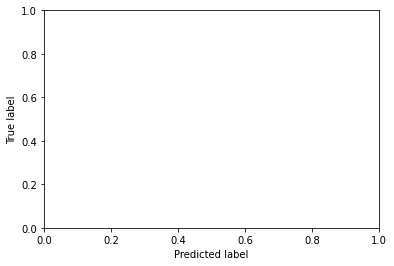

In [25]:
plt.ylabel('True label') 
plt.xlabel('Predicted label') 
plt.show()

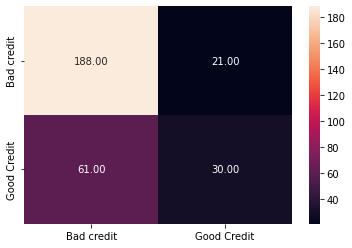

In [26]:
draw_cm(Y_pred_df.actual,Y_pred_df.predicted)

In [27]:
print(metrics.classification_report(Y_pred_df.actual, Y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       209
           1       0.59      0.33      0.42        91

    accuracy                           0.73       300
   macro avg       0.67      0.61      0.62       300
weighted avg       0.70      0.73      0.70       300

